# Linear Regression

Using headbrain data set

In [1]:
# this enables the drawing of matplotlib figures in the IPython environment.
%matplotlib inline
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# setting default runtime configuration figure size
plt.rcParams['figure.figsize'] = (10.0, 5.0)

# reading data (from mounted google drive)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
# collecting X = independent variable and Y = dependent variable
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values
n = len(X) # total observations

**Formula**

slope(m) = (summation of (X - mean_x)(X - mean_y)) / (summation of (X - mean_x)^2)

In [3]:
# calculating mean
mean_x = np.mean(X)
mean_y = np.mean(Y)

# using the formula to calculate slope(m) and constant c
numer = 0
denom = 0

for i in range(n):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2

# slope (m)
m = numer/denom
# constant (c) = mean_y - m*mean_x
c = mean_y - (m * mean_x)

# print coefficients of regression line eq -> y = mx + c
print(m, c)

0.26342933948939945 325.57342104944223


**Plotting values and Regression Line (y = mx + c)**

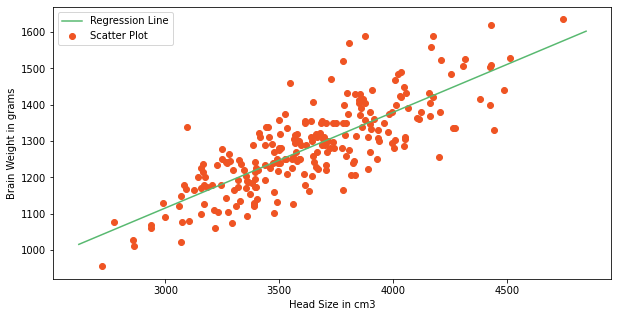

In [4]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = m*x + c

# plotting line
plt.plot(x, y, color='#58b970', label='Regression Line')
# plotting scatter pointer
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

**To check the goodness of fit**

Using R square method
R^2 = 1 - (summation of (y - yp)^2) / (summation of (y - mean_y)^2)

where,
 yp: predicted distance;
 y: actual distance

In [7]:
# Calculating R^2
ss_t = 0
ss_r = 0
for i in range(n):
  y_pred = m*X[i] + c
  ss_r += (Y[i] - y_pred) ** 2
  ss_t += (Y[i] - mean_y) ** 2

r2 = 1 - ss_r/ss_t
print(r2)

0.6393117199570003


# Linear Regression using scikit learn
Gives correct result

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# cannot use Rank 1 matrix in scikit learn
X = X.reshape((n, 1))
# creating model
reg = LinearRegression()
# fitting training data
reg = reg.fit(X, Y)
# Y prediction
Y_pred = reg.predict(X)

# calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)

r2_score = reg.score(X, Y)

print(r2_score)

0.639311719957
